# Testing everything

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import re
import yfinance as yf
from datetime import datetime, timedelta
import requests

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

def url(symbol:str):
    return f'https://finance.yahoo.com/quote/{symbol}/history/'

def etf_get(symbol:str):
    response = requests.get(url(symbol=symbol), headers=headers)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content
        df = pd.read_html(response.content)[0]
        # Your further processing here
        df.index = pd.to_datetime(df['Date'], format='%b %d, %Y')
        df = df['Close Close price adjusted for splits.']
        df.name = symbol
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
        df = None
    return df


Date
2024-12-13    27.40
2024-12-12    27.41
2024-12-11    27.25
2024-12-10    26.58
2024-12-09    26.17
              ...  
2023-12-19    30.02
2023-12-18    29.90
2023-12-15    30.05
2023-12-14    29.87
2023-12-13    29.26
Name: FLXK.DE, Length: 257, dtype: float64

In [13]:
symbols = ['FLXK.DE','ITEQ']

pd.concat([x for x in [etf_get(symbol) for symbol in symbols] if x is not None],axis=1).sort_index()

,FLXK.DE,ITEQ
Date,,
2023-12-13,29.26,NaN
2023-12-14,29.87,44.92
2023-12-15,30.05,44.74
2023-12-18,29.90,45.16
2023-12-19,30.02,45.96
...,...,...
2024-12-09,26.17,53.30
2024-12-10,26.58,52.36
2024-12-11,27.25,53.26


In [5]:
l[0]

('ARCX', 'SIVR', 'USD')

In [9]:


etf = yf.Ticker("SIVR")

# get all stock info
etf.history(period="12mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-06-15 00:00:00-04:00,22.639999,22.920000,22.639999,22.910000,618700,0.0,0.0,0.0
2023-06-16 00:00:00-04:00,23.070000,23.219999,22.910000,23.170000,637900,0.0,0.0,0.0
2023-06-20 00:00:00-04:00,22.370001,22.400000,22.120001,22.200001,568500,0.0,0.0,0.0
2023-06-21 00:00:00-04:00,21.889999,21.910000,21.570000,21.780001,875500,0.0,0.0,0.0
2023-06-22 00:00:00-04:00,21.559999,21.639999,21.379999,21.440001,399400,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-06-10 00:00:00-04:00,28.340000,28.510000,28.110001,28.400000,984900,0.0,0.0,0.0
2024-06-11 00:00:00-04:00,27.980000,28.059999,27.799999,27.940001,931800,0.0,0.0,0.0
2024-06-12 00:00:00-04:00,28.799999,28.860001,28.209999,28.309999,2168200,0.0,0.0,0.0


In [6]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

,DE000A2DR2L2,DE000A0X7541,DE000A1T73W9,LU1064047639,LU1997245177,LU1019989323,LU1093406186,LU1089088311,LU1594335520,LU0820561818,...,LU0759372021,LU0333249109,LU0384406244,LU0333249364,LU0219097184,LU0035744829,LU0848326269,LU0563308443,LU1380459278,LU0120690226
2022-11-14,142.48,318.68,1296.23,7.66,12.00,142.67,132.07,157.64,135.63,7.87,...,47.89,139.43,219.13,262.92,140.46,349.04,132.26,70.37,82.03,138.22
2022-11-15,143.45,321.11,1290.00,7.67,12.25,142.14,131.57,156.74,134.85,7.90,...,47.86,142.15,221.27,266.19,141.86,349.96,133.90,70.93,82.11,138.28
2022-11-16,141.29,318.20,1278.28,7.69,12.06,142.39,131.80,156.99,135.07,7.84,...,47.69,141.25,218.97,266.20,142.10,352.33,132.76,70.68,82.17,138.32
2022-11-17,141.05,317.67,1276.15,7.69,11.84,142.49,131.90,156.70,134.81,7.76,...,47.72,139.44,218.10,263.35,141.03,351.89,131.95,69.90,82.09,138.29
2022-11-18,141.83,316.96,1273.33,7.69,11.82,142.24,131.67,156.58,134.72,7.81,...,47.81,139.87,217.87,265.59,142.34,351.82,132.40,70.32,82.11,138.25


(array([0.00510565, 0.00765847, 0.01531695, 0.03829237, 0.06637345,
        0.08169039, 0.12764124, 0.13274689, 0.10211299, 0.08679604,
        0.04339802, 0.0306339 , 0.0306339 , 0.01786977, 0.04595085,
        0.04850367, 0.08424322, 0.17614491, 0.24251836, 0.2986805 ,
        0.23230706, 0.26038813, 0.19146186, 0.09445452, 0.0612678 ,
        0.01786977, 0.00510565, 0.00255282, 0.00255282, 0.00255282]),
 array([-2.793085  , -2.40136208, -2.00963915, -1.61791623, -1.22619331,
        -0.83447038, -0.44274746, -0.05102454,  0.34069839,  0.73242131,
         1.12414423,  1.51586716,  1.90759008,  2.29931301,  2.69103593,
         3.08275885,  3.47448178,  3.8662047 ,  4.25792762,  4.64965055,
         5.04137347,  5.43309639,  5.82481932,  6.21654224,  6.60826516,
         6.99998809,  7.39171101,  7.78343393,  8.17515686,  8.56687978,
         8.9586027 ]),
 <BarContainer object of 30 artists>)

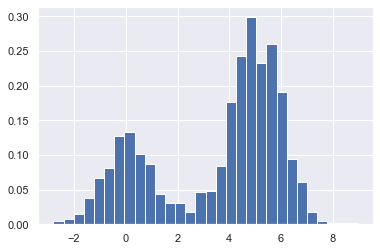

In [12]:
plt.hist(x, bins=30, density=True)

In [43]:
import numpy as np

class DominoSet(object):
    def __init__(self, set:list=None) -> None:
        if set is None:
            self.set = [{i,j} for i in range(0,7) for j in range(i,7)]
        else:
            self.set = set
    
    def find(self,n:int)->list:
        assert n in list(range(0,7))
        result_set = {tuple(s) for s in self.set if n in s}
        return [set(x) for x in result_set]
    
    def random_choice(self)-> set:
        assert self.set != set()
        return np.random.choice(self.set)
    
    def remove(self, p:set):
        assert set is not None
        self.set.remove(p)
    
    def add(self, p:set):
        assert set is not None
        self.set.append(p)
    
    def random_pop(self):
        p = self.random_choice()
        self.remove(p)
        return p
    
    def has(self, p:set):
        return p in self.set
    
    def points(self):
        return sum([sum(p) for p in self.set])

class DominoGameStatus(object):
    def __init__(self, played:list, left:int, right:int) -> None:
        self.played = played
        self.left = left
        self.right = right

PASS, LEFT, RIGHT = 0, 1, 2

class DominoPlayer(object):
    def __init__(self, name:str) -> None:
        self.name = name
        self.domino_set = DominoSet([])
    
    def options(self, game_status:DominoGameStatus)->tuple:
        return self.domino_set.find(game_status.left), self.domino_set.find(game_status.right)
    
    def play_random(self, game_status:DominoGameStatus):
        left_options, right_options = self.options(game_status=game_status)
        if len(left_options):
            return LEFT, np.random.choice(left_options)
        if len(right_options):
            return RIGHT, np.random.choice(right_options)
        return PASS, None
    
    def score(self):
        return self.domino_set.points()


class DominoGame(object):
    def __init__(self, n_players:int=2) -> None:
        assert n_players in [2,3,4]
        domino_set = DominoSet()
        if n_players == 3:
            domino_set.remove({0})
        player_set_size = len(domino_set.set) // n_players
        self.players = [DominoPlayer("player {}".format(i)) for i in range(n_players)]
        self.played = []
        self.left = None
        self.right = None
        self.current_player = None
        for pi, player in enumerate(self.players):
            for i in range(player_set_size):
                player.domino_set.add(domino_set.random_pop())
            if player.domino_set.has({6}):
                self.current_player = pi
        self.play_left({6})

    def play_left(self, p:set):
        if len(p) == 1:
            self.left = list(p)[0]
            if p == {6}:
                self.right = 6
            else:
                assert len(p & self.played[0])
        else:
            assert len(p & {self.left})
            self.left = list(p-{self.left})[0]
                            
        self.players[self.current_player].domino_set.set.remove(p)
        self.played = [p]+self.played
        self.current_player = (self.current_player + 1) % len(self.players)

    def play_right(self, p:set):
        if len(p) == 1:
            self.right = list(p)[0]
            if p == {6}:
                self.left = 6
            else:
                assert len(p & self.played[-1])
        else:
            assert len(p & {self.right})
            self.right = list(p-{self.right})[0]

        self.players[self.current_player].domino_set.set.remove(p)
        self.played.append(p)
        self.current_player = (self.current_player + 1) % len(self.players)
    
    def play_pass(self):
        self.current_player = (self.current_player + 1) % len(self.players)
    
    def play(self, side:int, p:set):
        assert side in [PASS, LEFT, RIGHT]
        if side == LEFT:
            self.play_left(p)
        elif side == RIGHT:
            self.play_right(p)
        else:
            self.play_pass()
    
    def game_status(self) -> DominoGameStatus:
        return DominoGameStatus(self.played, self.left, self.right)
    
    def end(self):
        if any([len(player.domino_set.set)==0 for player in self.players]):
            # One player has finished
            return True
        if all([player.play_random(self.game_status())[0]==PASS for player in self.players]):
            # No player can play
             return True
        return False
    


In [48]:
dg = DominoGame(3)
while not dg.end():
    side, p = dg.players[dg.current_player].play_random(dg.game_status())
    # print(dg.players[dg.current_player].name,":",(side, p))
    dg.play(side,p)
print(dg.played)
for player in dg.players:
    print(player.name, player.score(), player.domino_set.set)

[{1, 4}, {1}, {1, 3}, {3, 4}, {4}, {2, 4}, {2}, {1, 2}, {1, 6}, {0, 6}, {0, 4}, {4, 5}, {2, 5}, {2, 6}, {6}, {4, 6}]
player 0 23 [{3, 6}, {5, 6}, {3}]
player 1 21 [{2, 3}, {3, 5}, {0, 2}, {1, 5}]
player 2 14 [{0, 3}, {0, 1}, {5}, {0, 5}]


In [5]:
import os

os.listdir(".\cotacoes_morningstar")

['IE0002167009.csv',
 'IE00B19Z4C24.csv',
 'IE00B7VYKF47.csv',
 'IE00BD3B6K23.csv',
 'IE00BLP5S353.csv',
 'IE00BLP5S460.csv',
 'LU0046217351.csv',
 'LU0073232471.csv',
 'LU0094557526.csv',
 'LU0108459040.csv',
 'LU0115139569.csv',
 'LU0115767021.csv',
 'LU0117884675.csv',
 'LU0121204431.csv',
 'LU0122613903.csv',
 'LU0147401714.csv',
 'LU0149084633.csv',
 'LU0171290074.csv',
 'LU0171309270.csv',
 'LU0171310955.csv',
 'LU0172157363.csv',
 'LU0197230542.csv',
 'LU0213962813.csv',
 'LU0230817339.csv',
 'LU0244354824.csv',
 'LU0248173006.csv',
 'LU0248185513.csv',
 'LU0260085492.csv',
 'LU0262307480.csv',
 'LU0269905138.csv',
 'LU0273147594.csv',
 'LU0273148055.csv',
 'LU0286668966.csv',
 'LU0318933487.csv',
 'LU0332194157.csv',
 'LU0333810850.csv',
 'LU0344046312.csv',
 'LU0355585513.csv',
 'LU0382931250.csv',
 'LU0382932068.csv',
 'LU0384381660.csv',
 'LU0494093627.csv',
 'LU0522352607.csv',
 'LU0524465977.csv',
 'LU0705260262.csv',
 'LU0815616999.csv',
 'LU0823415012.csv',
 'LU082341714